# Carregando pacotes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Carregando dados

Lista com o nomes dos arquivos correspondendo à sequência de dados, neste caso foram três varreduras, cada uma com um valor diferente de resistência. Também será criado um vetor ``res_list = [r1,r2,r3]`` correspondendo aos valores de resistência. Note que abaixo estes são valores **nominais** dos componentes.

O melhor aqui é literalmente fazer um Ctrl-C, Ctrl-V no nome do arquivo que você gerou.

In [2]:
file_list = ['4 - 0,047uF - 100 - 10hz-50khz_dados.csv',
             '4 - 0,047uF - 1k - 10hz-50kz_dados.csv',
             '4 - 0,047uF - 10k - 10hz-50khz_dados.csv']
res_list = [1e2,1e3,1e4]  # lista com valores de resistência correspondente aos arquivos

Cada elemento da lista de arquivos pode ser acessada usando ```file_list[i]``` sendo ```i```  um número inteiro.  
<span style="color:red">**Note que em Python a contagem se inicia no** ```i=0```</span>.

Usaremos o pacotes [```pandas```](https://pandas.pydata.org) para ler os arquivos .CSV na forma de tabelas. Este pacote foi carregado com ```pd``` (``` import pandas as pd ```) no início deste notebook.
Para ter ajuda sobre o comando, digite ? antes do mesmo, por exemplo, ```?pd.read_csv```

In [3]:
df_list = [] # inicializamos uma lista que irá armazenar os três conjuntos de dados
for filename in file_list: # for loop sobre todos os arquivos da lista file_list
    df0 = pd.read_csv(filename) # comando para ler CSV, 
    df_list.append(df0) # concatena na lista o conjunto de dados

Pode-se visualizar o resultado, por exemplo:

In [4]:
df_list[0]

,frequencia (Hz),Vpp1 (V),Vpp2 (V),fase (Ch2-Ch1) (graus),T,T_dB
0,10.000000,3.387681,0.013266,-67.988274,0.000015,-48.143092
1,25.763014,3.954158,0.031632,92.631561,0.000064,-41.938438
2,66.373288,4.062914,0.078565,88.924309,0.000374,-34.272202
3,170.997595,4.050258,0.202184,85.819672,0.002492,-26.034704
4,440.541340,3.987944,0.579798,77.392075,0.021138,-16.749452
5,1134.967265,3.053780,2.001715,-13.469388,0.429664,-3.668708
6,2924.017738,4.084675,0.506432,-80.421051,0.015372,-18.132734
7,7533.150951,4.107714,0.177882,-86.101700,0.001875,-27.269348
8,19407.667237,4.120832,0.066705,-87.726402,0.000262,-35.816494
9,50000.000000,4.082793,0.021453,-80.559441,0.000028,-45.589451


Para acessar cada uma das colunas, a maneira mais simples é utilizando o nome da coluna:

In [5]:
df_list[0]['frequencia (Hz)'] #coluna de frequências do primeiro conjunto de dados

0       10.000000
1       25.763014
2       66.373288
3      170.997595
4      440.541340
5     1134.967265
6     2924.017738
7     7533.150951
8    19407.667237
9    50000.000000
Name: frequencia (Hz), dtype: float64

In [161]:
df_list[1]['frequencia (Hz)'] #coluna de frequências do segundo conjunto de dados

0       10.000000
1       25.763014
2       66.373288
3      170.997595
4      440.541340
5     1134.967265
6     2924.017738
7     7533.150951
8    19407.667237
9    50000.000000
Name: frequencia (Hz), dtype: float64

In [162]:
df_list[0]['Vpp1 (V)'] #coluna de Vpp1 do primeiro conjunto de dados

0    3.387681
1    3.954158
2    4.062914
3    4.050258
4    3.987944
5    3.053780
6    4.084675
7    4.107714
8    4.120832
9    4.082793
Name: Vpp1 (V), dtype: float64

# Gerando gráficos

## Gráfico simples de um dos dados

100 Ω


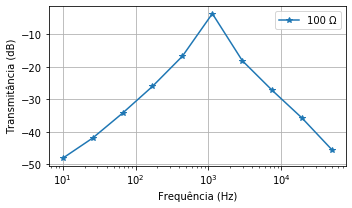

In [6]:
i=0 # selecionamos qual dos dataframes iremos trabalhar
df = df_list[i]
leg = '{:1g} Ω'.format(res_list[i]) # string definindo a legenda para esta figura
print(leg) # imprime a legenda para visualização

#------------------------------------
#Figura
#------
fig,ax = plt.subplots(1,figsize=(5,3))
ax.plot(df['frequencia (Hz)'],df['T_dB'],'*-',label=leg)
#formatando eixo x em scala log
ax.set_xscale('log')
#nome dos eixos
plt.xlabel('Frequência (Hz)')
plt.ylabel('Transmitância (dB)')
#posicao da legenda
plt.legend(loc='best')
#desenha grades
plt.grid()
#salva figura
plt.tight_layout() # ajusta para salvar
plt.savefig('exemplo_simples.pdf',bbox_to_anchor=True)
#------
plt.show()

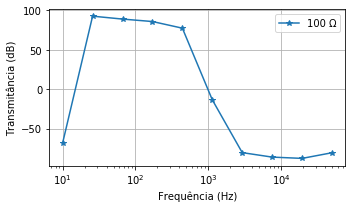

In [7]:
#------------------------------------
#Figura
#------
fig,ax = plt.subplots(1,figsize=(5,3))
ax.plot(df['frequencia (Hz)'],df['fase (Ch2-Ch1) (graus)'],'*-',label=leg)
#formatando eixo x em scala log
ax.set_xscale('log')
#nome dos eixos
plt.xlabel('Frequência (Hz)')
plt.ylabel('Transmitância (dB)')
#posicao da legenda
plt.legend(loc='best')
#desenha grades
plt.grid()
#salva figura
plt.tight_layout() # ajusta para salvar
plt.savefig('exemplo_simples.pdf',bbox_to_anchor=True)
#------
plt.show()

## Gráfico que coloca os três dados juntos

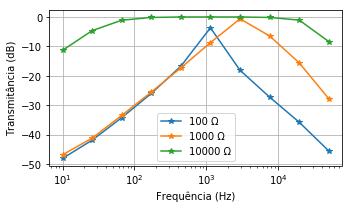

In [212]:
fig,ax = plt.subplots(1,figsize=(5,3))
for i  in range(0,3):
    df = df_list[i]
    leg = '{:1g} Ω'.format(res_list[i])
    ax.plot(df['frequencia (Hz)'],df['T_dB'],'*-',label=leg)
    ax.set_xscale('log')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Transmitância (dB)')
    plt.legend(loc='best',)
    plt.grid()  
plt.tight_layout() # ajusta para salvar
plt.savefig('exemplo_sobreposicao.pdf',bbox_to_anchor=True)
plt.show()

## Gráfico que concatena horizontalmente

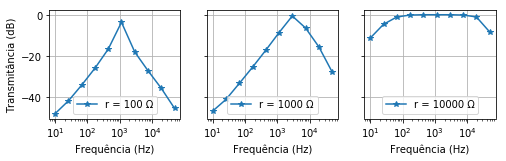

In [213]:
fig,ax = plt.subplots(1,3,figsize=(8,2),sharey=True)
for i  in range(0,3):
    df = df_list[i]
    leg = 'r = {:1g} Ω'.format(res_list[i])
    ax[i].plot(df['frequencia (Hz)'],df['T_dB'],'*-',label=leg)
    ax[i].set_xscale('log')
    ax[i].set_xlabel('Frequência (Hz)')
    ax[i].legend(loc='lower center')
    ax[i].grid()
    # apenas o eixo da esquerda (0) terá o nome!
    ax[0].set_ylabel('Transmitância (dB)')
plt.savefig('exemplo_horizontal.pdf',bbox_to_anchor=True)
plt.show()

## Gráfico que concatena verticalmente

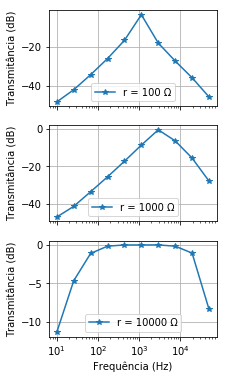

In [215]:
fig,ax = plt.subplots(3,1,figsize=(3,6),sharex=True)
for i  in range(0,3):
    df = df_list[i]
    leg = 'r = {:1g} Ω'.format(res_list[i])
    ax[i].plot(df['frequencia (Hz)'],df['T_dB'],'*-',label=leg)
    ax[i].set_xscale('log')
    ax[i].set_ylabel('Transmitância (dB)')
    ax[i].legend(loc='lower center')
    ax[i].grid()
    # apenas o eixo inferior (2) terá o nome!
    ax[2].set_xlabel('Frequência (Hz)')    
plt.savefig('exemplo_vertical.pdf',bbox_to_anchor=True)
plt.show()